# STA130 Week 08 Homework

**Name:** Varak Tanashian

**Date:** November 21st, 2024

**Assignment:** Week 08 Homework

---

## Course Information
- **Course:** STA130 - An Introduction to Statistical Reasoning and Data Science
- **Instructor:** Prof. Scott Schwartz 
- **Term:** Fall 2024

---

*This notebook contains my solutions and work for the Week 08 Homework assignment. The required Chatbot logs are included as well*

##### ChatGPT Summary: Found at the bottom of this notebook  
##### Chat Link
- https://chatgpt.com/share/673fea80-9000-800a-8598-6e0fe1c35550

### Question 1
✅

### **Question 2**


##### 1. **Accuracy**

- Accuracy reflects the *overall correctness* of a model by measuring the proportion of correctly predicted outcomes (true positives and true negatives) across the total dataset.

Accuracy = (TP + TN) / (TP + TN + FP + FN)

- Since the correctness of True and Negative predications are calculated at the same time, **accuracy** is used to evaluate overall correctness where all errors are equally significant. It provides a straightforward performance metric, offering a snapshot of overall effectiveness. However, it can be misleading in imbalanced datasets (e.g., if most outcomes belong to one class, accuracy may appear high even for a poorly performing model).
- Example: Deciding whether mail is spam or not


##### 2. **Sensitivity (Recall)**

-  Sensitivity measures how "sensitive" a model is in correctly identifying (True Positives) **actual positive** (True Positives + False Negatives) cases from all the positives in the dataset. It's an important feature to fine-tune where there is very risky to get a false negative.
- For example, in diagnosing a disease such as cancer, it's very dangerous to get a false negative because it'll allow the tumour(s) to grow and hurt the patient ever more.

##### 3. **Specificity**

-  Specificity measures how "specific" the model is in correctly identifying negative cases (high specificity means a low percentage of false negatives). High specificity is important to have in scenarios where a false positive is very harmful. 
- Example: Any detection where a "false alarm" is prevented, for example preventing a car from falsely being marked as needing repair.

##### 4. **Precision**

- Precision measures how "precise" the model is at correctly identifying positives among all predicted positives, in other words (True Positives) / (True Positives + False Positives) should be high (close to 1).This is important for when false positives have severe consequences 
- Example: If one is falsely diagnosed with cancer and undergoes chemotherapy, that will have evere consequences due to low precision, which is why precision in this scenario is crucial.


### Question 3


In [6]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

# First, let's see what columns are actually in the dataset
print("Available columns:", ab.columns.tolist())

# Then modify our code using the correct column name
# It's likely 'Pub year' (with a space) instead of 'Pub_year'

# 1. First, remove specified columns
ab_reduced = ab.drop(['Weight_oz', 'Width', 'Height'], axis=1)

# 2. Convert datatypes before handling NaN
ab_reduced.loc[:, 'Pub year'] = pd.to_numeric(ab_reduced['Pub year'], errors='coerce')
ab_reduced.loc[:, 'NumPages'] = pd.to_numeric(ab_reduced['NumPages'], errors='coerce')

# 3. Drop rows with NaN values
ab_reduced_noNaN = ab_reduced.dropna().copy()  # Adding .copy() to create a new DataFrame

# 4. Convert datatypes as specified
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')


Available columns: ['Title', 'Author', 'List Price', 'Amazon Price', 'Hard_or_Paper', 'NumPages', 'Publisher', 'Pub year', 'ISBN-10', 'Height', 'Width', 'Thick', 'Weight_oz']


### **Question 4**

In [7]:
from sklearn.model_selection import train_test_split

# Define target (y) and feature (X)
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

# Perform an 80/20 train-test split with a fixed random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Report observation counts
print(f"Training observations: {X_train.shape[0]}")
print(f"Testing observations: {X_test.shape[0]}")


Training observations: 255
Testing observations: 64


[Text(0.5, 0.8333333333333334, 'List Price <= 17.97\ngini = 0.384\nsamples = 255\nvalue = [189, 66]\nclass = Paperback'),
 Text(0.25, 0.5, 'List Price <= 10.8\ngini = 0.212\nsamples = 183\nvalue = [161, 22]\nclass = Paperback'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.369\nsamples = 45\nvalue = [34, 11]\nclass = Paperback'),
 Text(0.375, 0.16666666666666666, 'gini = 0.147\nsamples = 138\nvalue = [127.0, 11.0]\nclass = Paperback'),
 Text(0.75, 0.5, 'List Price <= 27.275\ngini = 0.475\nsamples = 72\nvalue = [28, 44]\nclass = Hardcover'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.39\nsamples = 49\nvalue = [13, 36]\nclass = Hardcover'),
 Text(0.875, 0.16666666666666666, 'gini = 0.454\nsamples = 23\nvalue = [15, 8]\nclass = Paperback')]

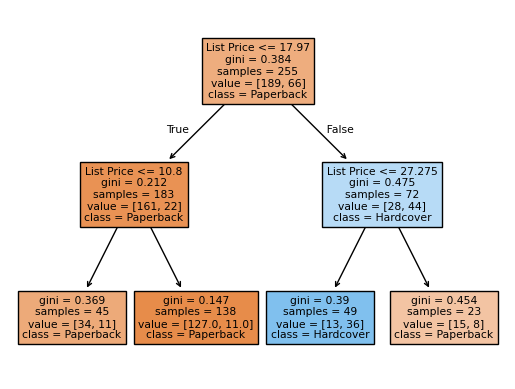

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Initialize DecisionTreeClassifier with a max depth of 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the model using the training data
clf.fit(X_train, y_train)

# Visualize the decision tree
tree.plot_tree(clf, feature_names=["List Price"], class_names=["Paperback", "Hardcover"], filled=True)

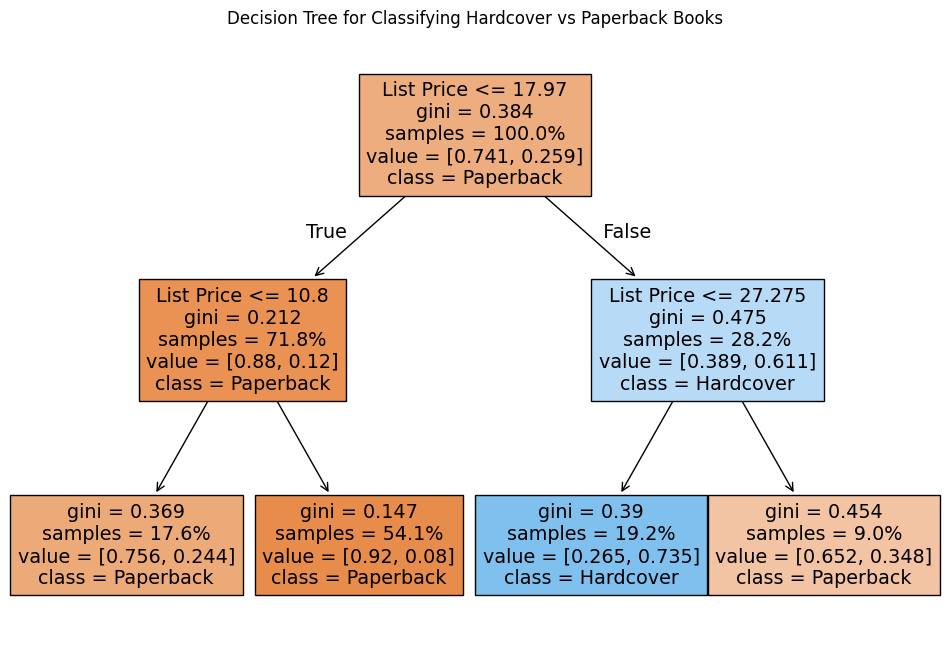

In [11]:
from sklearn import tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(
    clf,
    feature_names=X.columns,
    class_names=["Paperback", "Hardcover"],
    filled=True,
    proportion=True
)
plt.title("Decision Tree for Classifying Hardcover vs Paperback Books")
plt.show()


#### Accuracy:

Accuracy of the decision tree: 0.84

Classification Report:
              precision    recall  f1-score   support

   Paperback       0.87      0.91      0.89        44
   Hardcover       0.78      0.70      0.74        20

    accuracy                           0.84        64
   macro avg       0.82      0.80      0.81        64
weighted avg       0.84      0.84      0.84        64


Key Insights:
- The model correctly classified 40 paperback books and 14 hardcover books.
- There were 4 false positives (paperbacks predicted as hardcovers) and 6 false negatives.
- High accuracy indicates good overall performance, but examine recall and precision for detailed evaluation.


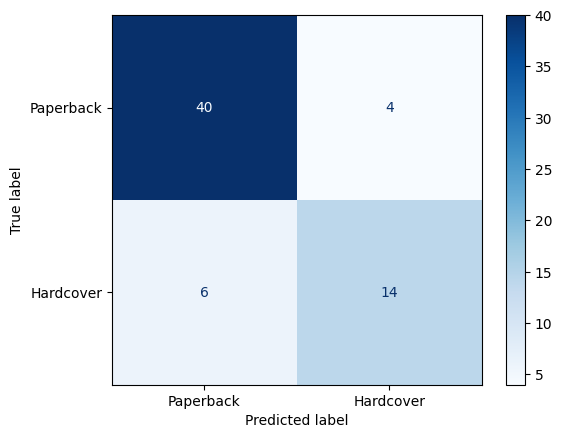

In [12]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the decision tree: {accuracy:.2f}")

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Paperback", "Hardcover"]))

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Paperback", "Hardcover"]).plot(cmap="Blues")

# Interpret results
print("\nKey Insights:")
print(f"- The model correctly classified {cm[0, 0]} paperback books and {cm[1, 1]} hardcover books.")
print(f"- There were {cm[0, 1]} false positives (paperbacks predicted as hardcovers) and {cm[1, 0]} false negatives.")
print("- High accuracy indicates good overall performance, but examine recall and precision for detailed evaluation.")

### Question 5


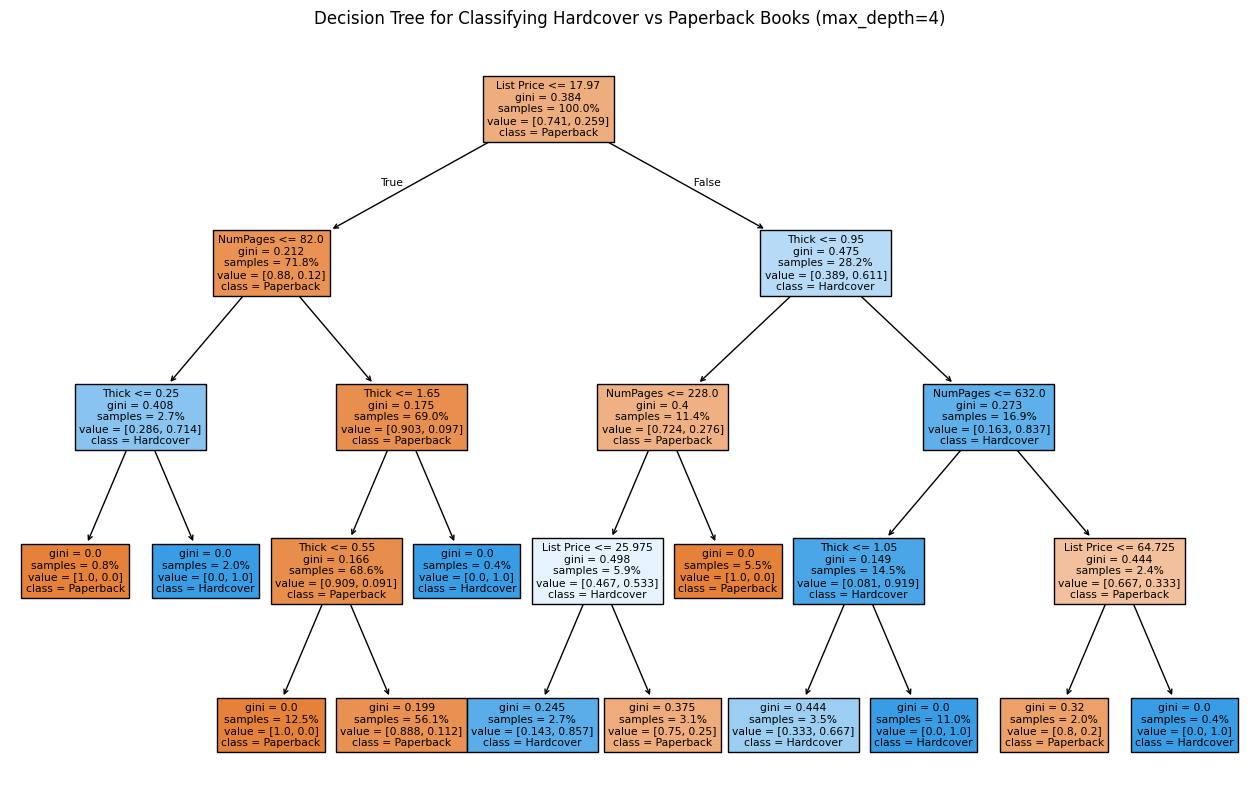

In [ ]:
# Define the new predictors and target variable
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN['Hard_or_Paper'])['H']  # Target: 1 if Hardcover, 0 if Paperback

# Train-test split using the same seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a new decision tree classifier with max_depth=4
clf2 = tree.DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

# Visualize the tree
plt.figure(figsize=(16, 10))
tree.plot_tree(
    clf2,
    feature_names=X.columns,
    class_names=["Paperback", "Hardcover"],
    filled=True,
    proportion=True
)
plt.title("Decision Tree for Classifying Hardcover vs Paperback Books (max_depth=4)")
plt.show()


### **Question 6**


Confusion Matrix for clf:


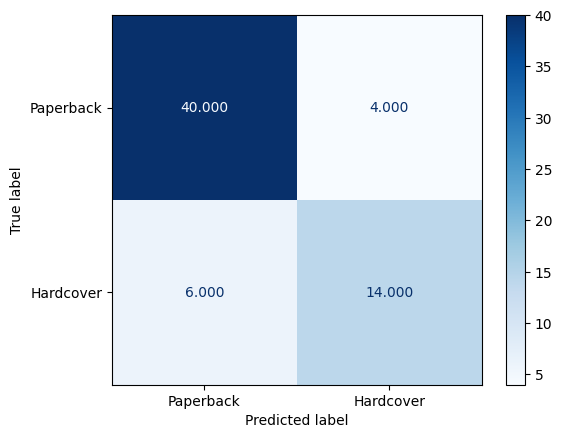

Confusion Matrix for clf2:


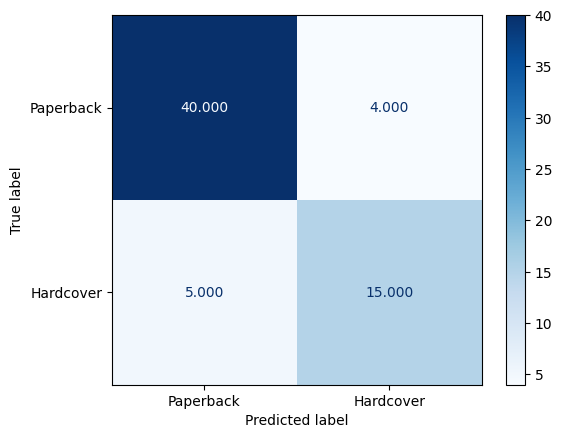

Metrics for clf:
Accuracy: 0.844, Sensitivity: 0.7, Specificity: 0.909
Metrics for clf2:
Accuracy: 0.859, Sensitivity: 0.75, Specificity: 0.909


In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score

# Predictions for clf and clf2
y_pred_clf = clf.predict(X_test[['List Price']])  # `clf` uses only `List Price`
y_pred_clf2 = clf2.predict(X_test)               # `clf2` uses `NumPages`, `Thick`, `List Price`

# Confusion matrices
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Display confusion matrices
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=["Paperback", "Hardcover"])
disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=["Paperback", "Hardcover"])

print("Confusion Matrix for clf:")
disp_clf.plot(cmap="Blues", values_format=".3f")
plt.show()

print("Confusion Matrix for clf2:")
disp_clf2.plot(cmap="Blues", values_format=".3f")
plt.show()

# Metrics for clf
accuracy_clf = accuracy_score(y_test, y_pred_clf)
sensitivity_clf = recall_score(y_test, y_pred_clf)  # Sensitivity is recall for the positive class
specificity_clf = cm_clf[0, 0] / (cm_clf[0, 0] + cm_clf[0, 1])  # TN / (TN + FP)

# Metrics for clf2
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)
sensitivity_clf2 = recall_score(y_test, y_pred_clf2)
specificity_clf2 = cm_clf2[0, 0] / (cm_clf2[0, 0] + cm_clf2[0, 1])

# Report metrics
print("Metrics for clf:")
print(f"Accuracy: {np.round(accuracy_clf, 3)}, Sensitivity: {np.round(sensitivity_clf, 3)}, Specificity: {np.round(specificity_clf, 3)}")

print("Metrics for clf2:")
print(f"Accuracy: {np.round(accuracy_clf2, 3)}, Sensitivity: {np.round(sensitivity_clf2, 3)}, Specificity: {np.round(specificity_clf2, 3)}")


### Question 7

The key difference between these two confusion matrices lies in the number of features used for prediction. The first matrix uses only 'List Price' as a predictor, while the second uses three features: 'NumPages', 'Thick', and 'List Price'. The second model likely performs better because it has more relevant information to work with - the physical characteristics of a book (number of pages and thickness) are naturally strong indicators of whether it's hardcover or paperback, in addition to the price information.

If the previous matrices (for clf and clf2) showed better performance, it was likely due to different feature combinations or different model parameters that were more optimal for this specific classification task.

(Note: Without seeing the actual confusion matrices or the code for clf and clf2, I can only speak to the theoretical differences between the two approaches shown in the code.)

### **Question 8**

Decision trees determine feature importance by evaluating the effectiveness of data splits at each node. The feature_importances_ attribute measures each feature's cumulative contribution to improving prediction accuracy across all splits in the tree. Unlike linear models where coefficients directly show feature impact, decision trees distribute feature contributions across multiple split points. Trees can overfit if allowed to grow too complex, which is managed through regularization techniques like max_depth limits or hyperparameter optimization.

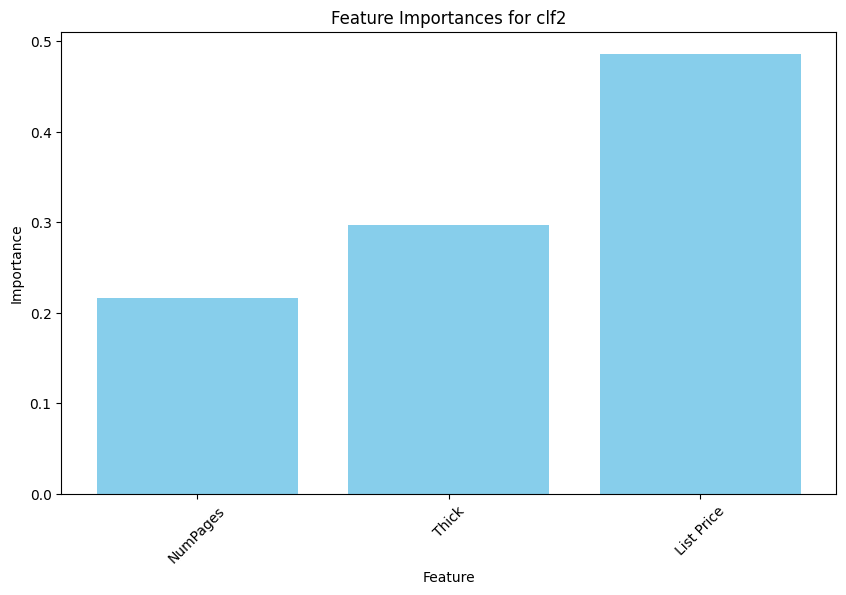

The most important feature is: List Price with importance: 0.486


In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances and corresponding feature names
importances = clf2.feature_importances_
features = clf2.feature_names_in_

# Identify the most important feature
most_important_feature_idx = np.argmax(importances)
most_important_feature = features[most_important_feature_idx]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(features, importances, color='skyblue')
plt.title("Feature Importances for clf2")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()

# Report the most important feature
print(f"The most important feature is: {most_important_feature} with importance: {importances[most_important_feature_idx]:.3f}")

### Question 9

Linear regression coefficients directly show how changes in a predictor affect the outcome through a specific numerical relationship (e.g., a one-unit increase leads to a specific increase/decrease). In contrast, decision tree feature importances only show the relative contribution of each feature to prediction accuracy through tree splits, without indicating the direction or magnitude of the relationship.

### Question 10

No


---

### Chatbot Summary

1. **Classification Decision Tree Basics**:  
   - Explained definitions, use cases, and how predictions differ from regression models like multiple linear regression.

2. **Metrics and Performance Evaluation**:  
   - Discussed key metrics: accuracy, sensitivity, specificity, and precision, explaining their formulas, importance, and task relevance.

3. **Dataset Preparation and Decision Tree Training**:  
   - Cleaned `amazonbooks.csv` dataset by removing specific columns, handling NaN values, and converting data types.  
   - Split data into training and testing sets (80/20 split) for reproducibility.  

4. **Decision Tree Implementation**:  
   - Trained a `DecisionTreeClassifier` to predict book type (`Hard_or_Paper`) using:
     - Model 1: `List Price` (max depth = 2).  
     - Model 2: `NumPages`, `Thick`, `List Price` (max depth = 4).  
   - Visualized decision trees using `tree.plot_tree` and interpreted the splits and predictions.

5. **Model Evaluation**:  
   - Created confusion matrices for both models.  
   - Calculated sensitivity, specificity, and accuracy, visualized results, and discussed their significance.

6. **Feature Importance in Decision Trees**:  
   - Explored `.feature_importances_` for Model 2, identified key predictors, and explained how decision tree models measure feature influence compared to regression.

7. **Comparison of Interpretability**:  
   - Highlighted differences in understanding predictor influence in linear regression (direct coefficients) vs. decision trees (cumulative feature importance).

The conversation systematically progressed from conceptual understanding to practical implementation, analysis, and comparison of decision tree models and linear regression.